In [7]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_data = pd.read_csv(r"Data\train.csv")
test_data = pd.read_csv(r"Data\test.csv")


In [9]:
train_data['price2'] = train_data['price'] / train_data['Feature 1']
train_data['price3'] = train_data['price'] / train_data['Feature 1'].apply(lambda x : x*x)
#train_data['price4'] = train_data['price'] / train_data['Feature 1'].apply(lambda x : x*x*x)
#train_data['Feature 1.1'] = train_data['Feature 1'].apply(lambda x : x*x)
train_data['Feature 26.1'] = train_data["Feature 26"]/train_data['Feature 1']
train_data['Feature 24.1'] = train_data["Feature  24"]/train_data['Feature 1']
train_data['Feature 25.1'] = train_data["Feature 25"]/train_data['Feature 1']
#train_data['Feature 26.2'] = train_data["Feature 26"]/train_data['Feature 1'].apply(lambda x : x*x)
#train_data['Feature 24.2'] = train_data["Feature  24"]/train_data['Feature 1'].apply(lambda x : x*x)
#train_data['Feature 25.2'] = train_data["Feature 25"]/train_data['Feature 1'].apply(lambda x : x*x)

test_data['Feature 26.1'] = test_data["Feature 26"]/test_data['Feature 1']
test_data['Feature 24.1'] = test_data["Feature  24"]/test_data['Feature 1']
test_data['Feature 25.1'] = test_data["Feature 25"]/test_data['Feature 1']



In [10]:
train_data['price3'].count()

135501

In [11]:
test_data

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 26.1,Feature 24.1,Feature 25.1
0,132523,132523,0.80,0,0,0,1,0,0,0,...,0,0,60.1,59.0,6.04,5.99,3.61,4.512500,7.550000,7.487500
1,70210,70210,0.56,0,0,1,0,0,0,1,...,0,0,62.1,54.0,5.31,5.28,3.28,5.857143,9.482143,9.428571
2,93051,93051,1.01,0,0,0,1,0,0,0,...,0,0,61.6,62.0,6.40,6.35,3.92,3.881188,6.336634,6.287129
3,67325,67325,0.30,0,0,0,0,1,0,0,...,1,0,62.9,58.0,4.26,4.30,2.69,8.966667,14.200000,14.333333
4,189522,189522,0.23,0,0,0,1,0,0,1,...,0,1,62.4,58.0,3.96,3.98,2.47,10.739130,17.217391,17.304348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58067,51474,51474,1.00,0,0,1,0,0,1,0,...,0,0,61.8,56.0,6.34,6.48,3.96,3.960000,6.340000,6.480000
58068,50296,50296,0.73,0,0,1,0,0,0,1,...,0,0,62.1,57.0,5.74,5.77,3.58,4.904110,7.863014,7.904110
58069,95077,95077,1.10,0,0,0,1,0,0,0,...,0,0,62.2,58.0,6.59,6.54,4.08,3.709091,5.990909,5.945455
58070,71500,71500,0.91,0,0,0,1,0,0,1,...,0,0,58.0,60.0,6.42,6.35,3.71,4.076923,7.054945,6.978022


In [12]:
train_data.loc[train_data['price3'] > 15000 ].count()

Unnamed: 0      40
id              40
Feature 1       40
Feature 2       40
Feature 3       40
Feature 4       40
Feature 5       40
Feature 6       40
Feature 7       40
Feature 8       40
Feature 9       40
Feature 10      40
Feature 11      40
Feature 12      40
Feature 13      40
Feature 14      40
Feature 15      40
Feature 16      40
Feature 17      40
Feature 18      40
Feature 19      40
Feature 20      40
Feature 21      40
Feature 22      40
Feature 23      40
Feature  24     40
Feature 25      40
Feature 26      40
price           40
price2          40
price3          40
Feature 26.1    40
Feature 24.1    40
Feature 25.1    40
dtype: int64

In [13]:
train_data.loc[(train_data['price3'] > 12500) | (train_data['price3'] < 1700) ].shape


(141, 34)

In [14]:
train_data2 = train_data.loc[(train_data['price3'] < 12500) & (train_data['price3'] > 1700)]

In [15]:
train_data= train_data.drop('Unnamed: 0',axis=1)


In [16]:

train_corr = train_data.corr().drop([f'Feature {x}' for x in range(2,23)]).drop('id').drop('id',axis=1)

In [17]:
train_corr = train_corr.apply(lambda x : abs(x))

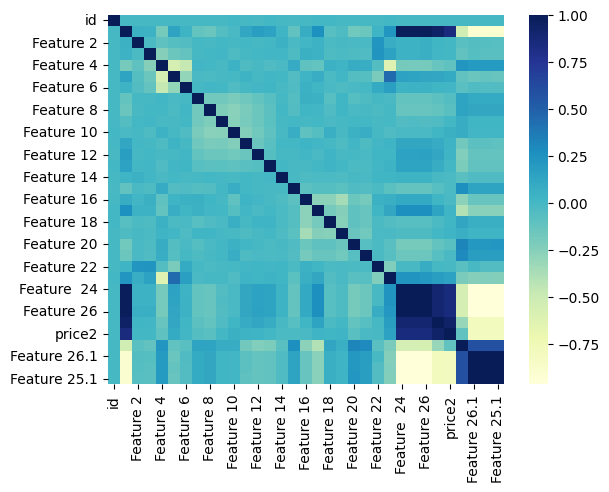

In [18]:
dataplot = sns.heatmap(train_data.corr(), cmap="YlGnBu")

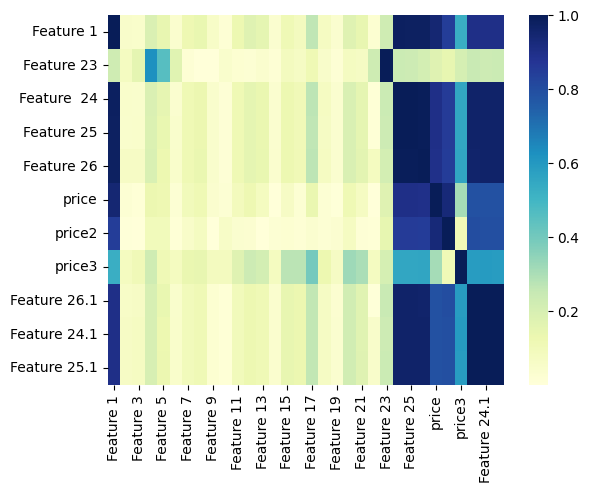

In [19]:
dataplot = sns.heatmap(train_corr, cmap="YlGnBu")


<Axes: xlabel='price2', ylabel='Count'>

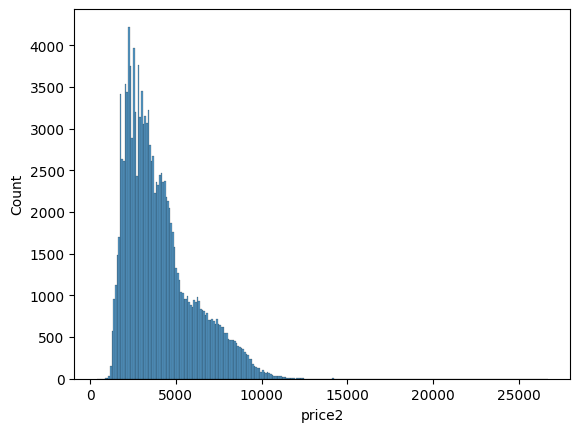

In [20]:
sns.histplot(x="price2",data=train_data)

<Axes: xlabel='price3', ylabel='Count'>

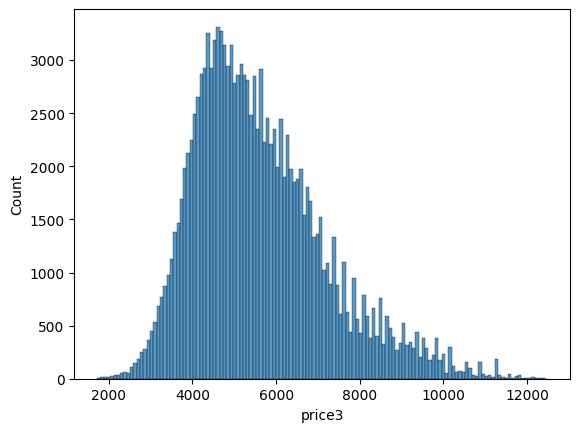

In [21]:
sns.histplot(x="price3",data=train_data2)


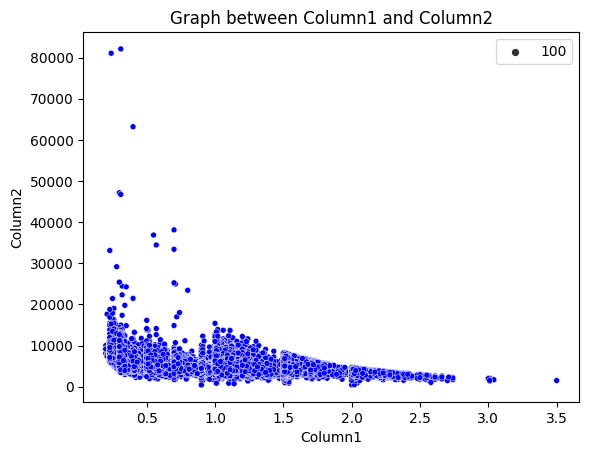

In [22]:
sns.scatterplot(x='Feature 1', y='price3', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()


In [16]:
temp = train_data["Feature 1"]

In [17]:
temp = train_data['Feature 1'].apply(lambda x : x * x )

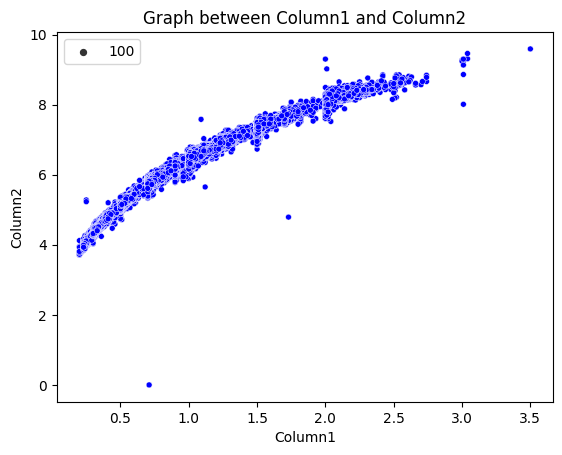

In [18]:
sns.scatterplot(x='Feature 1', y='Feature 25', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

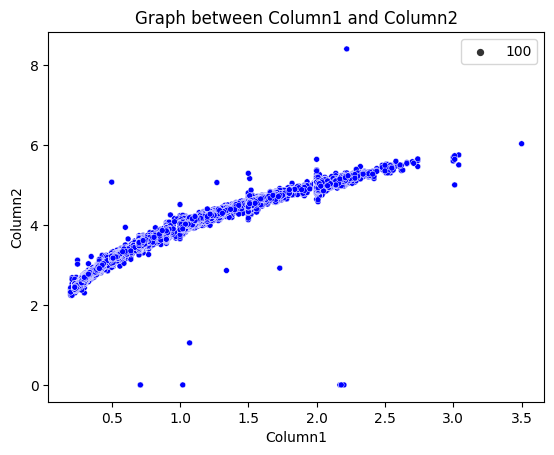

In [19]:
sns.scatterplot(x='Feature 1', y='Feature 26', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()


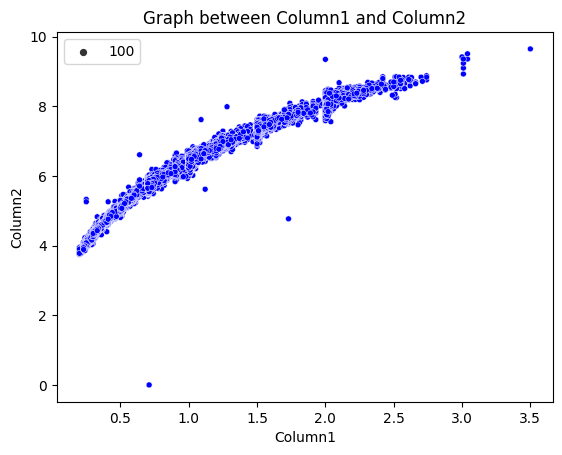

In [20]:
sns.scatterplot(x='Feature 1', y='Feature  24', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()


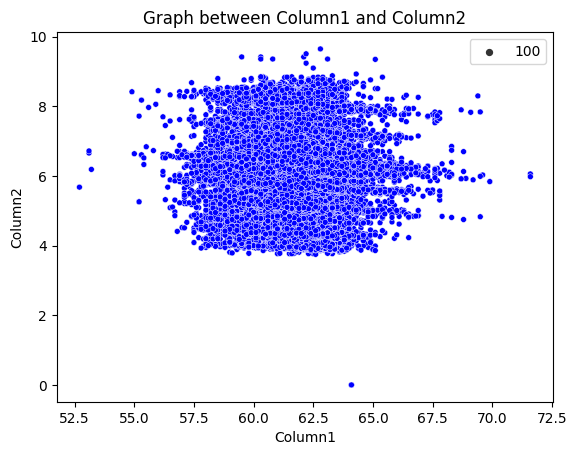

In [21]:
sns.scatterplot(x='Feature 22', y='Feature  24', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()


In [51]:
for col in data.columns:
    unique_values = data[col].unique()
    if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
        print(f"{col} contains only 0 and 1")

NameError: name 'data' is not defined

In [78]:
target_variable = train_data["price3"]

In [79]:
train_data

,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 23,Feature 24,Feature 25,Feature 26,price,price2,price3,Feature 26.1,Feature 24.1,Feature 25.1
0,143728,0.53,0,0,1,0,0,0,1,0,...,56.0,5.16,5.20,3.21,1656,3124.528302,5895.336419,6.056604,9.735849,9.811321
1,52657,0.50,0,1,0,0,0,0,0,0,...,56.0,4.89,5.02,3.18,1063,2126.000000,4252.000000,6.360000,9.780000,10.040000
2,124407,2.03,0,0,1,0,0,0,0,0,...,60.0,8.39,8.29,4.94,18508,9117.241379,4491.251911,2.433498,4.133005,4.083744
3,45535,0.33,0,0,1,0,0,0,1,0,...,55.0,4.41,4.47,2.73,723,2190.909091,6639.118457,8.272727,13.363636,13.545455
4,178894,0.90,0,1,0,0,0,0,0,0,...,59.0,6.04,6.08,3.86,3187,3541.111111,3934.567901,4.288889,6.711111,6.755556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135496,34345,0.70,0,1,0,0,0,1,0,0,...,57.0,5.65,5.61,3.56,2380,3400.000000,4857.142857,5.085714,8.071429,8.014286
135497,9899,0.33,0,0,1,0,0,0,0,0,...,57.0,4.43,4.40,2.77,693,2100.000000,6363.636364,8.393939,13.424242,13.333333
135498,142454,2.03,0,0,0,1,0,0,0,0,...,59.0,8.38,8.30,4.97,16068,7915.270936,3899.148244,2.448276,4.128079,4.088670
135499,129168,0.73,0,1,0,0,0,0,1,0,...,59.0,5.67,5.72,3.61,2964,4060.273973,5562.019141,4.945205,7.767123,7.835616


In [54]:
X_train ,X_test,y_train,y_test = train_test_split(data_input,target_variable, test_size=0.2, random_state=42)

NameError: name 'data_input' is not defined

In [55]:

rf = RandomForestRegressor(n_estimators = 10, max_features = 'sqrt', max_depth = 5, random_state = 18)


In [56]:
rf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [55]:
y_pred = rf.predict(X_test)


In [56]:
data_output = pd.DataFrame(y_pred,y_test)
data_output

,0
price,
1412,1490.8
2027,1881.4
2397,2192.7
4969,4554.7
5887,5830.2
...,...
625,677.6
3927,3822.1
405,467.9


In [57]:
with_feature1 = {}

with_feature1['Mean Absolute Error:'] =  metrics.mean_absolute_error(y_test, y_pred)  
with_feature1['Mean Squared Error:'] =  metrics.mean_squared_error(y_test, y_pred) 
with_feature1['Root Mean Squared Error:'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [58]:
with_feature1

{'Mean Absolute Error:': 324.39246153278475,
 'Mean Squared Error:': 410113.5632297701,
 'Root Mean Squared Error:': 640.401095587578}

In [59]:
rf.score(X_test, y_test)

0.9746743086233429

In [129]:
#filename = 'mymodel.sav'
#pickle.dump(rf, open(filename, 'wb'))

In [47]:
train_data2.to_csv('./Data/train_data3.csv',index=False)
test_data.to_csv('./Data/test_data3.csv',index=False)